In [1]:
# Import Modules
# Test
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


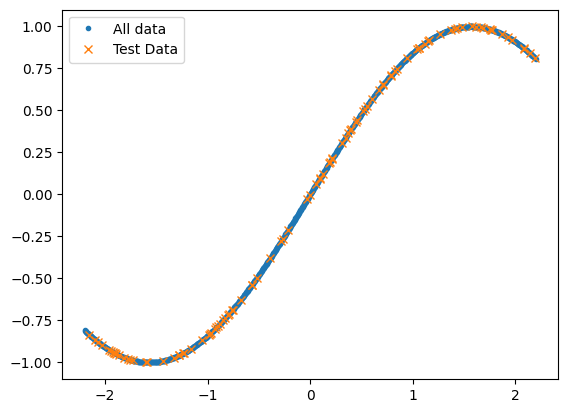

In [3]:
# Define Data to be used
x = np.linspace(-0.7*np.pi, 0.7*np.pi, 1000)
y = np.sin(x)

# Split data into training and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)

# Visualize all data and test data
plt.plot(x, y, '.', label='All data')
plt.plot(x_test, y_test, 'x', label='Test Data')
plt.legend()
plt.show()

In [4]:
# Convert training data to PyTorch Tensors and move to device
x_train = torch.Tensor(x_train).float().view(-1, 1).to(device)
y_train = torch.Tensor(y_train).float().view(-1, 1).to(device)
x_test = torch.Tensor(x_test).float().view(-1, 1).to(device)
y_test = torch.Tensor(y_test).float().view(-1, 1).to(device)

In [5]:
# Define Neural Network Architecture
class NN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

input_size = 1
hidden_size = 64
output_size = 1

model = NN(input_size, hidden_size, output_size).to(device)  # Move model to device
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_dataset = TensorDataset(x_train, y_train)  
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)

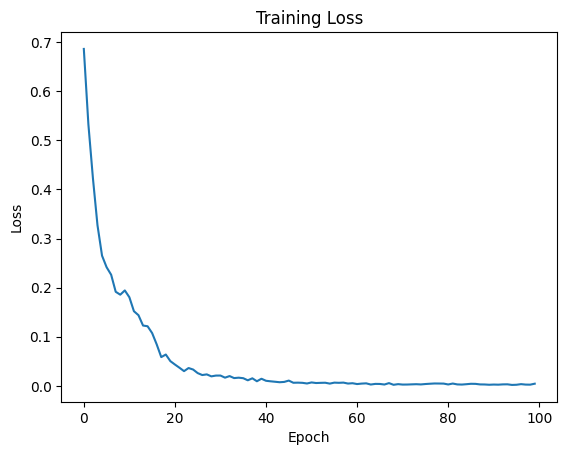

In [6]:
# Define Neural Network Training Parameters

num_epochs = 100
losses = []
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    losses.append(loss.item())
    
plt.title('Training Loss')
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [7]:
# Evaluate Mean Absolute Error of Model
with torch.no_grad():
    model.eval()  # Set model to evaluation mode
    predictions = model(x_test)  
    mae = torch.mean(torch.abs(predictions - y_test))
    print(f'MAE: {mae.item():.6f}')

MAE: 0.005423


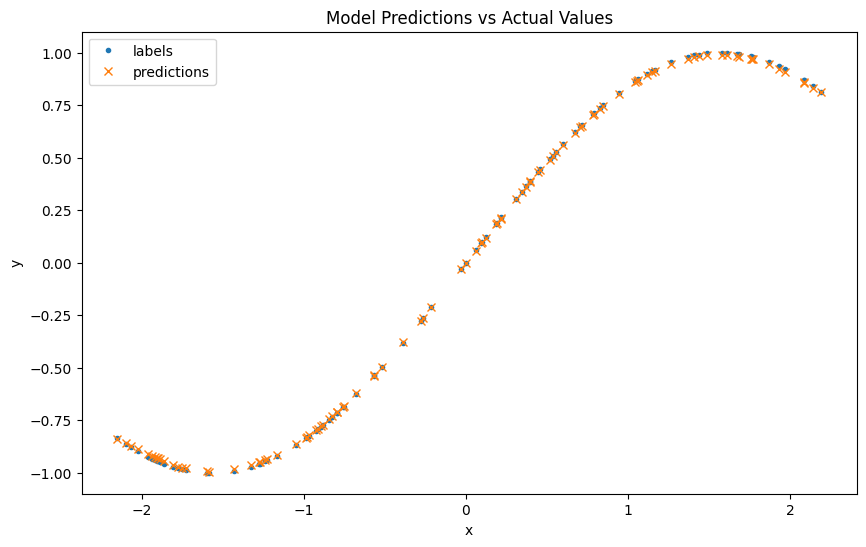

In [8]:
# Plot predicted value vs actual value

plt.figure(figsize=(10, 6))
prd = predictions.cpu().numpy().ravel()  # Move back to CPU for plotting
plt.plot(x_test.cpu().numpy(), y_test.cpu().numpy(), '.', label='labels')
plt.plot(x_test.cpu().numpy(), prd, 'x', label='predictions')
plt.title('Model Predictions vs Actual Values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()